In [ ]:
pip install numpy
pip install pandas
pip install matplotlib
pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


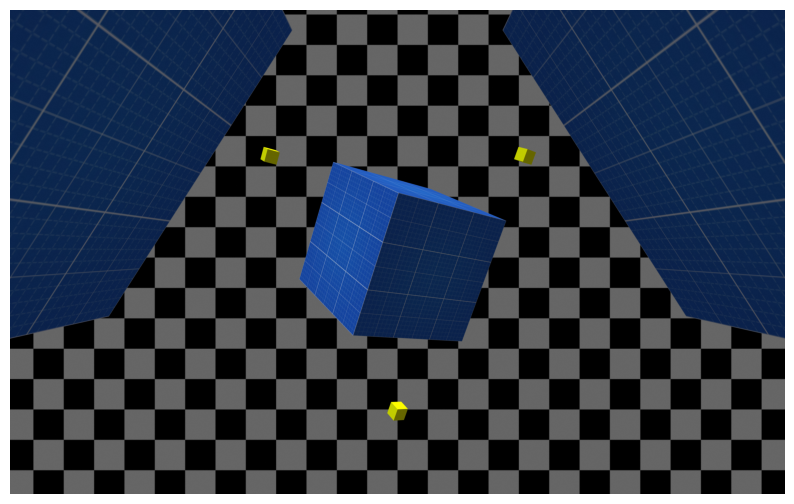

In [27]:
color_cv = np.load('last_color.npy')

color_cv = color_cv[..., ::-1]

plt.figure(figsize=(10, 8))
plt.imshow(color_cv)
plt.axis('off')
plt.show()

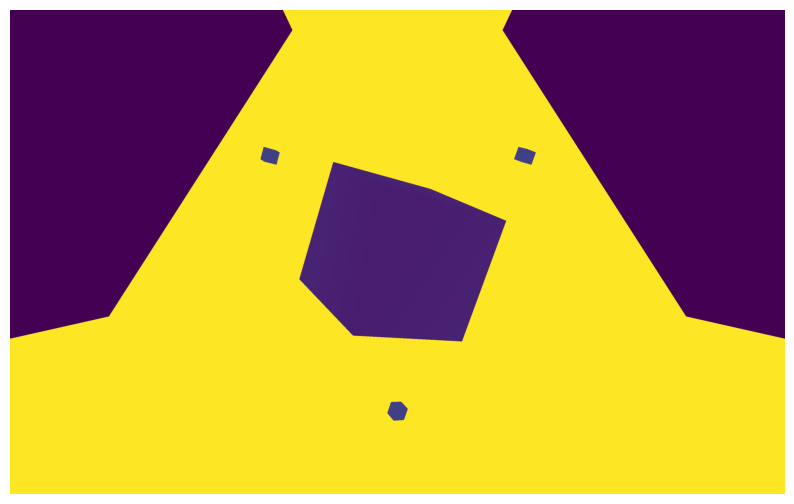

In [5]:
depth_cv = np.load('last_depth.npy')

depth_cv[np.isnan(depth_cv)] = 0

plt.figure(figsize=(10, 8))
plt.imshow(depth_cv)
plt.axis('off')
plt.show()

[[[ 10  34  75]
  [ 12  36  77]
  [ 12  36  77]
  ...
  [ 10  34  75]
  [ 13  37  78]
  [ 10  34  75]]

 [[ 13  37  78]
  [ 10  34  75]
  [ 13  37  78]
  ...
  [ 13  37  78]
  [ 12  36  77]
  [ 11  35  76]]

 [[ 11  35  76]
  [ 13  37  78]
  [ 14  38  79]
  ...
  [ 12  36  77]
  [ 12  36  77]
  [ 11  35  76]]

 ...

 [[106 106 106]
  [101 101 101]
  [102 102 102]
  ...
  [  0   0   0]
  [  1   1   1]
  [  1   1   1]]

 [[100 100 100]
  [103 103 103]
  [102 102 102]
  ...
  [  3   3   3]
  [  1   1   1]
  [  0   0   0]]

 [[103 103 103]
  [102 102 102]
  [101 101 101]
  ...
  [  1   1   1]
  [  0   0   0]
  [  0   0   0]]]
0.09523809523809523


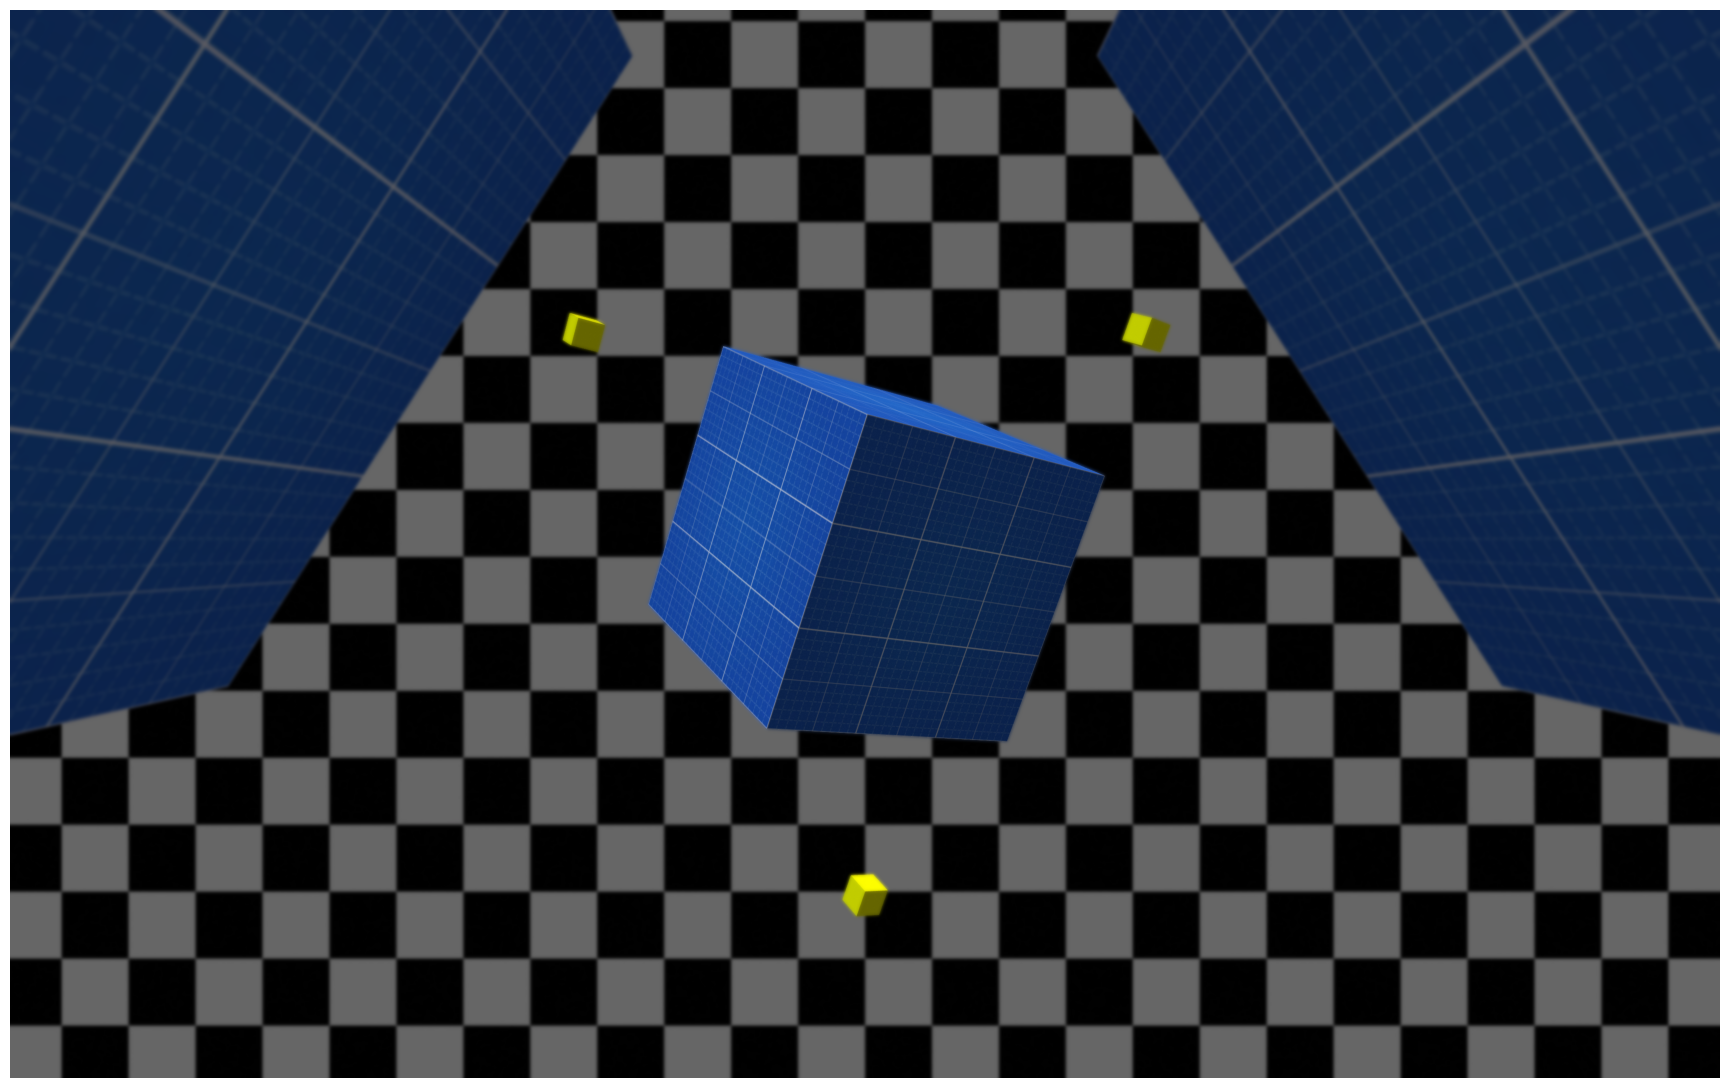

In [ ]:


depth_normalized = (depth_cv - depth_cv.min()) / (depth_cv.max() - depth_cv.min())

focus_distance = 2 / 21

print(color_cv)
print(depth_cv)

depth_normalized = (depth_cv - depth_cv.min()) / (depth_cv.max() - depth_cv.min())

blur_strength = depth_normalized - focus_distance

negative_mask = blur_strength < - (1 / 21)
positive_mask = blur_strength >= 0

blur_strength[negative_mask] = np.abs(blur_strength[negative_mask]) * 20

blur_strength[positive_mask] = blur_strength[positive_mask]

blur_strength = np.clip(blur_strength, 0, 1)

blur_strength = np.clip(blur_strength * 5, 0, 1)

blurred_img = cv2.GaussianBlur(color_cv, (21, 21), 0)
out = (1 - blur_strength[:, :, np.newaxis]) * color_cv + blur_strength[:, :, np.newaxis] * blurred_img
out = out.astype(np.uint8)

plt.figure(figsize=(75, 25))
plt.subplot(1, 3, 3)
plt.imshow(out)
plt.axis('off')
plt.show()

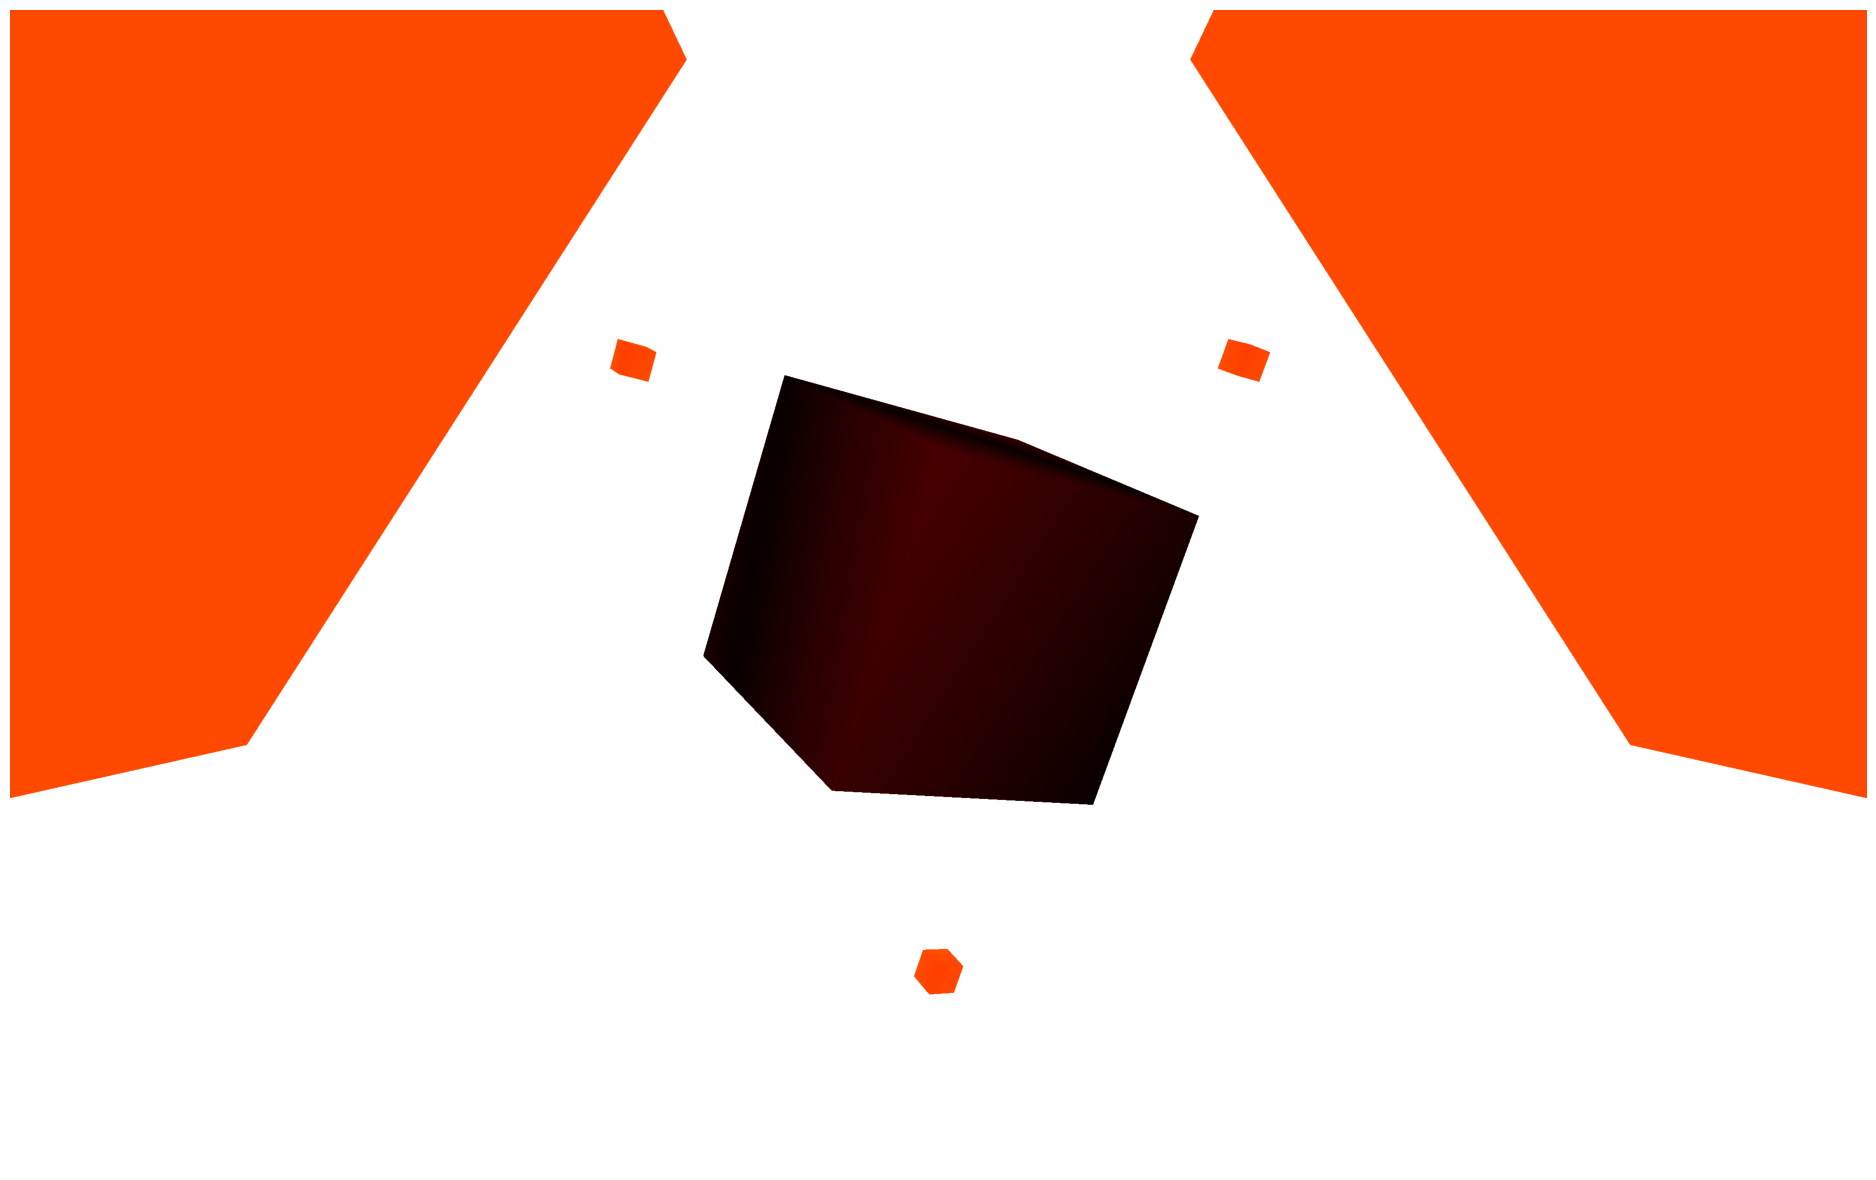

In [7]:
focus_distance = 2

depth_normalized = (depth_cv - depth_cv.min()) / (depth_cv.max() - depth_cv.min())
focus_distance_norm = focus_distance / 21

blur_strength = np.abs(depth_normalized - focus_distance_norm)
blur_strength = np.clip(blur_strength * 5, 0, 1)

plt.figure(figsize=(75, 25))

plt.subplot(1, 4, 4)
plt.imshow(blur_strength, cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()